In [1]:
import pandas as pd
import nltk
from nltk.stem import SnowballStemmer
from nltk.corpus import stopwords
import re
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\PC\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.


True

In [3]:
df=pd.read_csv('realdonaldtrump.csv')
df

,id,link,content,date,retweets,favorites,mentions,hashtags
0,1698308935,https://twitter.com/realDonaldTrump/status/169...,Be sure to tune in and watch Donald Trump on L...,2009-05-04 13:54:25,510,917,NaN,NaN
1,1701461182,https://twitter.com/realDonaldTrump/status/170...,Donald Trump will be appearing on The View tom...,2009-05-04 20:00:10,34,267,NaN,NaN
2,1737479987,https://twitter.com/realDonaldTrump/status/173...,Donald Trump reads Top Ten Financial Tips on L...,2009-05-08 08:38:08,13,19,NaN,NaN
3,1741160716,https://twitter.com/realDonaldTrump/status/174...,New Blog Post: Celebrity Apprentice Finale and...,2009-05-08 15:40:15,11,26,NaN,NaN
4,1773561338,https://twitter.com/realDonaldTrump/status/177...,"""My persona will never be that of a wallflower...",2009-05-12 09:07:28,1375,1945,NaN,NaN
...,...,...,...,...,...,...,...,...
43347,1273405198698975232,https://twitter.com/realDonaldTrump/status/127...,Joe Biden was a TOTAL FAILURE in Government. H...,2020-06-17 19:00:32,23402,116377,NaN,NaN
43348,1273408026968457216,https://twitter.com/realDonaldTrump/status/127...,Will be interviewed on @ seanhannity tonight a...,2020-06-17 19:11:47,11810,56659,@seanhannity,NaN
43349,1273442195161387008,https://twitter.com/realDonaldTrump/status/127...,pic.twitter.com/3lm1spbU8X,2020-06-17 21:27:33,4959,19344,NaN,NaN
43350,1273442469066276864,https://twitter.com/realDonaldTrump/status/127...,pic.twitter.com/vpCE5MadUz,2020-06-17 21:28:38,4627,17022,NaN,NaN


In [4]:
# Ta linia kodu usuwa kolumny link, mentions oraz hashtags z DataFrame df. Parametr axis=1 wskazuje, 
# że operacja dotyczy kolumn (w przeciwieństwie do wierszy, które byłyby wskazane przez axis=0). 
# Parametr inplace=True powoduje, że zmiany są wykonywane bezpośrednio na DataFrame df, 
# bez potrzeby przypisywania wyniku do nowej zmiennej.
df.drop(['link', 'mentions','hashtags'], axis=1, inplace=True)

# Ta linia pobiera listę angielskich stop słów (czyli słów, które są często usuwane podczas przetwarzania tekstu, 
#                                               ponieważ nie niosą znaczącej wartości informacyjnej) 
# z pakietu NLTK i przypisuje ją do zmiennej stop_words.
stop_words=stopwords.words('english')

# Ta linia tworzy obiekt SnowballStemmer dla języka angielskiego, który jest używany do sprowadzania słów do ich rdzeni (stemów). 
# Stemming jest procesem redukcji słów do ich podstawowej formy, co pomaga w ujednoliceniu różnych form tego samego słowa 
# (np. "running", "ran" i "runs" są sprowadzane do "run").
stemmer=SnowballStemmer('english')
df

,id,content,date,retweets,favorites
0,1698308935,Be sure to tune in and watch Donald Trump on L...,2009-05-04 13:54:25,510,917
1,1701461182,Donald Trump will be appearing on The View tom...,2009-05-04 20:00:10,34,267
2,1737479987,Donald Trump reads Top Ten Financial Tips on L...,2009-05-08 08:38:08,13,19
3,1741160716,New Blog Post: Celebrity Apprentice Finale and...,2009-05-08 15:40:15,11,26
4,1773561338,"""My persona will never be that of a wallflower...",2009-05-12 09:07:28,1375,1945
...,...,...,...,...,...
43347,1273405198698975232,Joe Biden was a TOTAL FAILURE in Government. H...,2020-06-17 19:00:32,23402,116377
43348,1273408026968457216,Will be interviewed on @ seanhannity tonight a...,2020-06-17 19:11:47,11810,56659
43349,1273442195161387008,pic.twitter.com/3lm1spbU8X,2020-06-17 21:27:33,4959,19344
43350,1273442469066276864,pic.twitter.com/vpCE5MadUz,2020-06-17 21:28:38,4627,17022


In [5]:
# @\S+: Usunięcie nazw użytkowników Twittera (słów zaczynających się od @).
# https?:\S+: Usunięcie linków zaczynających się od "https" lub "http".
# http?:\S: Usunięcie linków zaczynających się od "http".
# [^A-Za-z0-9]+: Usunięcie wszystkich znaków, które nie są literami 
# alfabetu angielskiego ani cyframi (czyli usunięcie znaków specjalnych).

TEXT_CLEANING_RE = "@\S+|https?:\S+|http?:\S|[^A-Za-z0-9]+"

def preprocess(text, stem=False):
    text = re.sub(TEXT_CLEANING_RE, ' ', str(text).lower()).strip()
    tokens = []
    for token in text.split():
        if token not in stop_words:
            if stem:
                tokens.append(stemmer.stem(token))
            else:
                tokens.append(token)
    return " ".join(tokens)

<>:1: SyntaxWarning: invalid escape sequence '\S'
<>:1: SyntaxWarning: invalid escape sequence '\S'
C:\Users\PC\AppData\Local\Temp\ipykernel_2676\2781078171.py:1: SyntaxWarning: invalid escape sequence '\S'
  TEXT_CLEANING_RE = "@\S+|https?:\S+|http?:\S|[^A-Za-z0-9]+"


In [7]:
#Aplikacja preprocessingu

df.content = df.content.apply(lambda x: preprocess(x))

df.head()

,id,content,date,retweets,favorites
0,1698308935,sure tune watch donald trump late night david ...,2009-05-04 13:54:25,510,917
1,1701461182,donald trump appearing view tomorrow morning d...,2009-05-04 20:00:10,34,267
2,1737479987,donald trump reads top ten financial tips late...,2009-05-08 08:38:08,13,19
3,1741160716,new blog post celebrity apprentice finale less...,2009-05-08 15:40:15,11,26
4,1773561338,persona never wallflower rather build walls cl...,2009-05-12 09:07:28,1375,1945


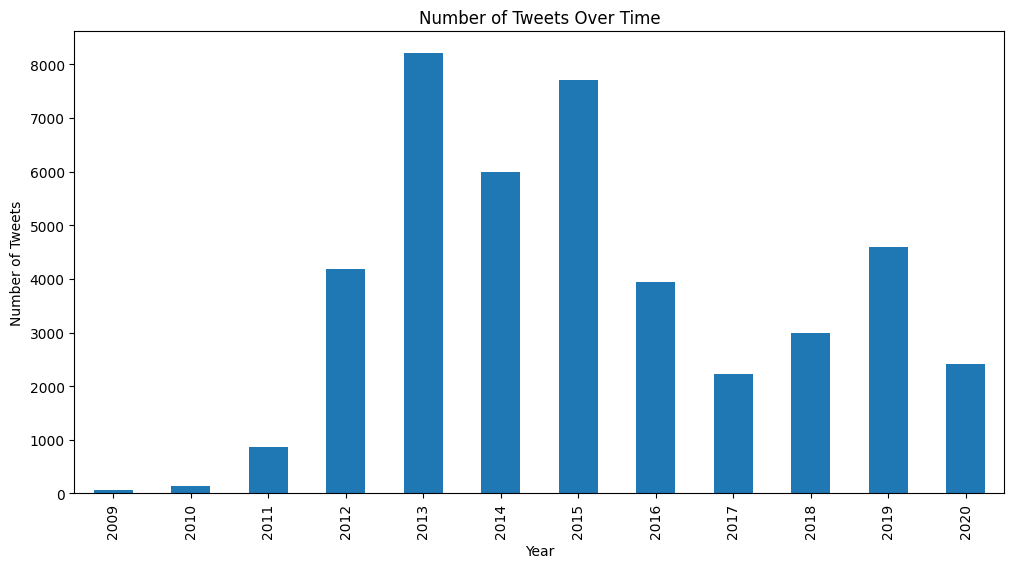

In [8]:
df['date']=pd.to_datetime(df['date'])

df['year'] = df['date'].dt.year
df['month'] = df['date'].dt.month
df['dayofweek'] = df['date'].dt.dayofweek

tweets_per_year = df['year'].value_counts().sort_index()

tweets_per_year.plot(kind='bar', figsize=(12, 6))
plt.xlabel('Year')
plt.ylabel('Number of Tweets')
plt.title('Number of Tweets Over Time')
plt.show()


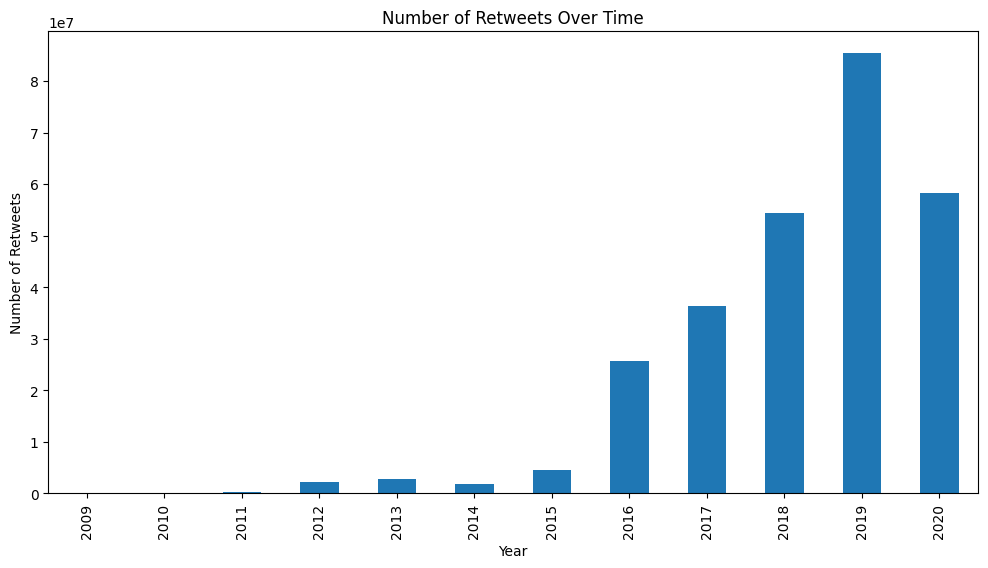

In [9]:
retweets_per_year = df.groupby('year')['retweets'].sum()
retweets_per_year.plot(kind='bar', figsize=(12, 6))
plt.xlabel('Year')
plt.ylabel('Number of Retweets')
plt.title('Number of Retweets Over Time')
plt.show()

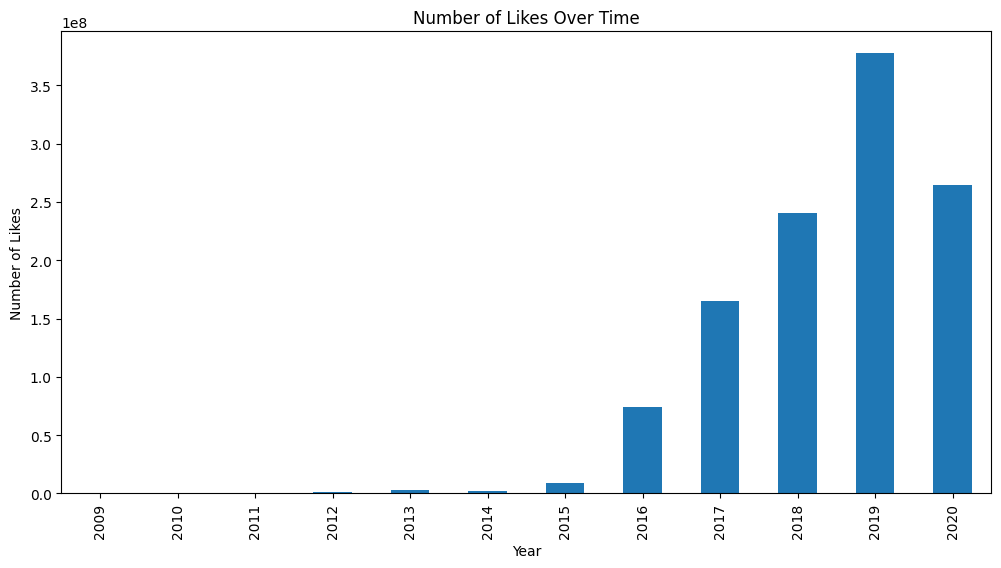

In [10]:
likes_per_year = df.groupby('year')['favorites'].sum()
likes_per_year.plot(kind='bar', figsize=(12, 6))
plt.xlabel('Year')
plt.ylabel('Number of Likes')
plt.title('Number of Likes Over Time')
plt.show()

In [12]:
df.columns
df.to_csv('cleaned_trump_tweets.csv',columns=['content'], index=False)